# EDA (Exploratory data analysis) U.S. International Air Traffic data(1990-2020)

<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/JAL_night_landing_at_Osaka_International_Airport.jpg/1200px-JAL_night_landing_at_Osaka_International_Airport.jpg >

## Objective

- ### __The main objective of this analysis is to find the distance between two loactions (starting and ending)__
- ### __Find the max distance by carrier 0, carrier 1, maximum starting location__

## Explanation

- ### __In this analysis geopy, pydeck, geopandas, pandas, matplot, shapely libraries are used.__

### 1. Importing libraries for reading data and ploting

In [1]:
import pandas as pd
import geopandas as gpd

### 2. For more details about column name can find in the below link

- ### [Info](https://opendatanetwork.herokuapp.com/dataset/datahub.transportation.gov/xgub-n9bw)

### 3. For accessing dataset

- ### [Dataset](https://www.kaggle.com/parulpandey/us-international-air-traffic-data)
- ### [original_dataset](https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report)

In [2]:
!pip install openpyxl

### 4. Detailed information about all column names

In [3]:
read = pd.read_excel('read_file.xlsx')
read.head(16)

,Column Name,API Column Name,Data Type,Description,Sample Values
0,data_dte,data_dte,calendar_date,Data Date,2019-06-01T00:00:00.000
1,Year,year,number,Data Year,2018
2,Month,month,number,Data Month,3
3,usg_apt_id,usg_apt_id,number,US Gateway Airport ID - assigned by US DOT to ...,12478
4,usg_apt,usg_apt,text,US Gateway Airport Code - usually assigned by ...,JFK
5,usg_wac,usg_wac,number,US Gateway World Area Code - assigned by US DO...,33
6,fg_apt_id,fg_apt_id,number,Foreign Gateway Airport ID - assigned by US DO...,16271
7,fg_apt,fg_apt,text,Foreign Gateway Airport Code - usually assigne...,YYZ
8,fg_wac,fg_wac,number,Foreign Gateway World Area Code - assigned by ...,148
9,airlineid,airlineid,number,Airline ID - assigned by US DOT to identify an...,19805


In [4]:
print(read['Description'][4])
print(read['Description'][7])
print(read['Description'][9]) #U.S. Department of Transportation (US DOT)
print(read['Description'][11])

US Gateway Airport Code - usually assigned by IATA, but in absence of IATA designation, may show FAA-assigned code
Foreign Gateway Airport Code - usually assigned by IATA, but in absense of IATA designation, may show FAA-assigned code
Airline ID - assigned by US DOT to identify an air carrier
Carrier Group Code - 1 denotes US domestic air carriers, 0 denotes foreign air carriers


### 5. Reading the original data set for the analysis

In [5]:
data_ = pd.read_csv('airlines/International_Report_Departures.csv')
data_

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


### 5.1. Analysis Part-I

In [6]:
#finding unique airline id from the dataset
data_.loc[:, 'airlineid'].nunique()

705

In [7]:
#checking the data types in the columns
data_.dtypes

data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

In [8]:
#changing the column name
data_.rename(columns= {'data_dte':'Date'}, inplace= True)
data_.head()

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [9]:
#converting the data type of date column to 'to_datetime' from 'object'
data_.loc[:, 'Date'] = data_.loc[:, 'Date'].apply(pd.to_datetime)

### 5.2. Final datatypes of dataset

In [10]:
data_.dtypes

Date            datetime64[ns]
Year                     int64
Month                    int64
usg_apt_id               int64
usg_apt                 object
usg_wac                  int64
fg_apt_id                int64
fg_apt                  object
fg_wac                   int64
airlineid                int64
carrier                 object
carriergroup             int64
type                    object
Scheduled                int64
Charter                  int64
Total                    int64
dtype: object

In [11]:
#sorting the values
data_.sort_values(by = 'Date', inplace= True)
data_.head()

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
113618,1990-01-01,1990,1,12889,LAS,85,16173,YQR,921,19523,CP,0,Departures,0,12,12
341188,1990-01-01,1990,1,12892,LAX,91,10148,ACA,148,19559,MX,0,Departures,2,0,2
454881,1990-01-01,1990,1,12892,LAX,91,12101,HEL,425,19538,AY,0,Departures,16,0,16
185140,1990-01-01,1990,1,14843,SJU,3,10711,BOG,327,20194,JW,1,Departures,0,1,1
137034,1990-01-01,1990,1,13487,MSP,63,16304,ZIH,148,20312,TZ,1,Departures,0,2,2


In [12]:
#reset indexing the dataset
data_.reset_index(drop= True, inplace= True)
data_.head()

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,1990-01-01,1990,1,12889,LAS,85,16173,YQR,921,19523,CP,0,Departures,0,12,12
1,1990-01-01,1990,1,12892,LAX,91,10148,ACA,148,19559,MX,0,Departures,2,0,2
2,1990-01-01,1990,1,12892,LAX,91,12101,HEL,425,19538,AY,0,Departures,16,0,16
3,1990-01-01,1990,1,14843,SJU,3,10711,BOG,327,20194,JW,1,Departures,0,1,1
4,1990-01-01,1990,1,13487,MSP,63,16304,ZIH,148,20312,TZ,1,Departures,0,2,2


### 5.3. Descriptive statistics of US airport

In [13]:
data_['usg_apt'].describe()

count     930808
unique      1022
top          MIA
freq      133820
Name: usg_apt, dtype: object

## 6. Detailed information about dataset

In [31]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          930808 non-null  datetime64[ns]
 1   Year          930808 non-null  int64         
 2   Month         930808 non-null  int64         
 3   usg_apt_id    930808 non-null  int64         
 4   usg_apt       930808 non-null  object        
 5   usg_wac       930808 non-null  int64         
 6   fg_apt_id     930808 non-null  int64         
 7   fg_apt        930808 non-null  object        
 8   fg_wac        930808 non-null  int64         
 9   airlineid     930808 non-null  int64         
 10  carrier       927753 non-null  object        
 11  carriergroup  930808 non-null  int64         
 12  type          930808 non-null  object        
 13  Scheduled     930808 non-null  int64         
 14  Charter       930808 non-null  int64         
 15  Total         930

### 7. Analysis Part-II

### 7.1. Creating a new dataset

In [14]:
new_data = data_.iloc[:, [1,4,7,10,11]]
new_data.columns = ['Year', 'Starting', 'Destination', 'Carrier','Carrier_type']
new_data.set_index('Year')

,Starting,Destination,Carrier,Carrier_type
Year,,,,
1990,LAS,YQR,CP,0
1990,LAX,ACA,MX,0
1990,LAX,HEL,AY,0
1990,SJU,BOG,JW,1
1990,MSP,ZIH,TZ,1
...,...,...,...,...
2020,CLT,MUC,AA,1
2020,MSP,CZM,SY,1
2020,BNA,YYZ,AC,0


### 7.2. Finding a unique airport id in both start and end points

In [15]:
a = len(new_data['Starting'].unique())
b = len(new_data['Destination'].unique())
print(a,b)

1022 1669


In [16]:
start_point = set(new_data['Starting'].unique())
end_point = set(new_data['Destination'].unique())

### 7.3. Creating a new dataset for US domestic air carriers

In [17]:
# udac = US domestic air carriers
udac = data_[data_.loc[:, 'carriergroup'] == 1]
udac.reset_index(drop= True, inplace = True)
print(udac.shape)
udac.head()

(557890, 16)


,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,1990-01-01,1990,1,14843,SJU,3,10711,BOG,327,20194,JW,1,Departures,0,1,1
1,1990-01-01,1990,1,13487,MSP,63,16304,ZIH,148,20312,TZ,1,Departures,0,2,2
2,1990-01-01,1990,1,14100,PHL,23,16163,YQB,941,20218,JKQ,1,Departures,0,15,15
3,1990-01-01,1990,1,12478,JFK,22,16271,YYZ,936,19805,AA,1,Departures,1,0,1
4,1990-01-01,1990,1,12892,LAX,91,14299,PUS,778,19386,NW,1,Departures,1,0,1


In [18]:
# finding the unique values for us airport from udac dataset
udac['usg_apt'].nunique()

864

### 7.4. Detailed information about how to select a sample from dataset and below is the link for accessing complete information

#### [More_info](https://www.surveysystem.com/sscalc.htm)
- ### __Sample__ : A small subgroup or subset from the complete dataset
- ### __Population__ : Population represents whole dataset

    - ### The confidence interval (also called margin of error) is the plus-or-minus figure usually reported in newspaper or television opinion poll results. For example, if you use a confidence interval of 4 and 47% percent of your sample picks an answer you can be "sure" that if you had asked the question of the entire relevant population between 43% (47-4) and 51% (47+4) would have picked that answer.

    - ### The confidence level tells you how sure you can be. It is expressed as a percentage and represents how often the true percentage of the population who would pick an answer lies within the confidence interval. The 95% confidence level means you can be 95% certain; the 99% confidence level means you can be 99% certain. Most researchers use the 95% confidence level.

In [56]:
# sampling data
udac_air = udac.sample(500)
udac_air

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
352258,2010-07-01,2010,7,13523,MUL,34,12972,LHR,493,21352,0WQ,1,Departures,0,1,1
434354,2014-07-01,2014,7,10747,BRO,74,16477,QRO,148,20166,GFQ,1,Departures,0,1,1
200010,2003-07-01,2003,7,14107,PHX,81,10148,ACA,148,19991,HP,1,Departures,9,0,9
417986,2013-09-01,2013,9,14955,SPN,5,13694,NGO,736,19790,DL,1,Departures,1,0,1
278105,2007-03-01,2007,3,10721,BOS,13,10292,AMS,461,19386,NW,1,Departures,58,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550883,2019-12-01,2019,12,11697,FLL,33,13218,MDE,327,20409,B6,1,Departures,62,0,62
226622,2004-11-01,2004,11,11697,FLL,33,15147,TCB,204,20401,3M,1,Departures,34,0,34
446977,2015-02-01,2015,2,14869,SLC,87,16229,YVR,906,21167,CP,1,Departures,50,0,50
430103,2014-04-01,2014,4,14730,SDF,52,11874,GDL,148,19917,5X,1,Departures,26,0,26


In [58]:
udac_air.reset_index(drop= True, inplace = True)
udac_air.sort_values(by = 'Date', inplace = True)
udac_air

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,1990-04-01,1990,4,13930,ORD,41,13744,NRT,736,19386,NW,1,Departures,59,0,59
1,1990-05-01,1990,5,10299,ANC,1,11170,CTS,736,20095,WO,1,Departures,0,2,2
2,1990-05-01,1990,5,13303,MIA,33,10386,ASU,365,20149,PRQ,1,Departures,0,6,6
3,1990-06-01,1990,6,10299,ANC,1,13744,NRT,736,19874,8C,1,Departures,0,4,4
4,1990-06-01,1990,6,10821,BWI,35,16271,YYZ,936,20355,US,1,Departures,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-01-01,2020,1,12892,LAX,91,12972,LHR,493,19805,AA,1,Departures,100,0,100
494,2020-01-01,2020,1,13487,MSP,63,16271,YYZ,936,20363,9E,1,Departures,118,0,118
493,2020-01-01,2020,1,10732,BQN,3,14739,SDQ,224,20166,GFQ,1,Departures,0,80,80
495,2020-01-01,2020,1,10559,BFI,93,16229,YVR,906,20377,X9,1,Departures,0,3,3


In [59]:
c1_start = list(udac_air['usg_apt'])

In [23]:
# installing geopy library
!pip install geopy

### 7.5. Defining function is for calculating the longitudes and latitudes for 'US' location

In [394]:
# longitudes, latitudes
def addr_long(x):
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter
    lat_ = []
    long_ = []
    points = []
    for i in x:
        loc = Nominatim(user_agent="GetLoc")
        addr = (loc.geocode(i,country_codes= ["US"] , language= "en", timeout= 1000000))
        if addr is None:
            lat_.append(None)
            long_.append(None)
        else:
            longitude = addr.longitude
            latitude = addr.latitude
            points.append((latitude, longitude))
    return points
addr_long(['MIA Airport'])

[(25.7949789, -80.28672341095405)]

In [25]:
from geopy.geocoders import Nominatim
loc = Nominatim(user_agent="https://www.world-airport-codes.com/", timeout= 1000000)
addr = loc.geocode('AUG', country_codes= 'US')
addr

Location(Auglaize County, Ohio, United States, (40.5942186, -84.2641951, 0.0))

In [ ]:
# calculating the starting location
slocation = [] 
for i in c1_start[0:len(c1_start)]:
    x = addr_long([i])
    slocation.append(x)
slocation

In [61]:
# creating a new dataframe with starting location
c1 = pd.DataFrame(slocation)
c1.columns = ['Location']
c1['Starting_Airport_code'] = c1_start
c1 = c1.reindex(columns= ["Starting_Airport_code", "Location"])
c1

,Starting_Airport_code,Location
0,ORD,"(41.977984899999996, -87.90917993412859)"
1,ANC,"(61.18103525, -149.99789189730433)"
2,MIA,"(40.0580258, -84.2236524)"
3,ANC,"(61.18103525, -149.99789189730433)"
4,BWI,"(39.1747196, -76.67075505810189)"
...,...,...
495,LAX,"(33.94216754999999, -118.42139298414197)"
496,MSP,"(44.878019050000006, -93.2209280537696)"
497,BQN,"(18.49346055, -67.13421586611547)"
498,BFI,"(47.5298443, -122.30089181028575)"


### 7.6. Codes_.csv gives information about all IATA codes, Airport, Country details

In [63]:
# Reading the csv file
country_codes = pd.read_csv('codes_.csv')
country_codes.head()

,Airport,Country,IATA
0,Aarhus,Denmark,AAR
1,Abadan,Iran,ABD
2,Abeche,Chad,AEH
3,Aberdeen,United Kingdom,ABZ
4,Aberdeen (SD),USA,ABR


In [64]:
# Complete information about dataset
country_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Airport  2030 non-null   object
 1   Country  1986 non-null   object
 2   IATA     1987 non-null   object
dtypes: object(3)
memory usage: 49.2+ KB


In [65]:
# dropping all 'NaN' values
country_codes.dropna(inplace = True)

In [66]:
# reseting index
country_codes.reset_index(drop = True, inplace = True)
print(country_codes.shape)
country_codes.head()

(1986, 3)


,Airport,Country,IATA
0,Aarhus,Denmark,AAR
1,Abadan,Iran,ABD
2,Abeche,Chad,AEH
3,Aberdeen,United Kingdom,ABZ
4,Aberdeen (SD),USA,ABR


In [79]:
c1_end = list(udac_air['fg_apt'])

In [116]:
# creating a new dataframe for foreign airport
foreign_airport = pd.DataFrame(c1_end)
foreign_airport.columns = ['IATA']
print(foreign_airport.shape)
foreign_airport.describe()

(500, 1)


,IATA
count,500
unique,165
top,CUN
freq,18


In [117]:
foreign_airport.head(6)

,IATA
0,NRT
1,CTS
2,ASU
3,NRT
4,YYZ
5,SEL


### __Merging the two dataframe and using the 'left'join__
<img src = https://miro.medium.com/max/1200/1*3ZU-U1xkeXobAKSy_WyWww.png>

In [118]:
foreign_air = pd.merge(left = foreign_airport, right = country_codes, on = ['IATA'], how = 'left')
foreign_air.columns = ['fg_apt', 'Airport', 'Country']
foreign_air

,fg_apt,Airport,Country
0,NRT,Tokyo - Narita,Japan
1,CTS,Sapporo - New Chitose Airport,Japan
2,CTS,Sapporo - New Chitose Airport,Japan
3,ASU,Asuncion - Asunción International Airport,Paraguay
4,NRT,Tokyo - Narita,Japan
...,...,...,...
546,LHR,London - Heathrow,United Kingdom
547,YYZ,Toronto - Toronto Pearson International Airport,Canada
548,SDQ,Santo Domingo,Dominican Republic
549,YVR,Vancouver - Vancouver International,Canada


In [ ]:
# Below codes are used to analysis common between both
x = (list(foreign_air['fg_apt']))
y = (list(foreign_airport['IATA']))
for i in y:
    print(i)

In [119]:
# dropping the rows to make it perfect
foreign_air.drop([2,11,13,31,37,52,60,78,96,98,100,110,126,130,142,148,154,155,158,161,169,170,175,191,195,199,208,211,219,220, 
                    252,257,259,290,314,319,338,340,341,381,382,403,412,419,432,435,461,463,469,478,491], inplace= True)

In [121]:
# modified dataset
foreign_air.reset_index(drop= True, inplace= True)
foreign_air

,fg_apt,Airport,Country
0,NRT,Tokyo - Narita,Japan
1,CTS,Sapporo - New Chitose Airport,Japan
2,ASU,Asuncion - Asunción International Airport,Paraguay
3,NRT,Tokyo - Narita,Japan
4,YYZ,Toronto - Toronto Pearson International Airport,Canada
...,...,...,...
495,LHR,London - Heathrow,United Kingdom
496,YYZ,Toronto - Toronto Pearson International Airport,Canada
497,SDQ,Santo Domingo,Dominican Republic
498,YVR,Vancouver - Vancouver International,Canada


### 7.7. Defining function is for calculating the longitudes and latitudes for foreign location airports

In [122]:
# for foreign airports - longtitudes, latitudes
def faddr_long(x):
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter
    flat_ = []
    flong_ = []
    fpoints = []
    for i in x:
        loc = Nominatim(user_agent="GetLoc")
        addr = (loc.geocode(i, language = 'en', timeout= 1000000))
        if addr is None:
            flat_.append(None)
            flong_.append(None)
        else:
            flongitude = addr.longitude
            flatitude = addr.latitude
            fpoints.append((flatitude, flongitude))
    return fpoints
faddr_long(['Tokyo - Narita'])

[(35.7118141, 139.7930076)]

In [195]:
# finding location using the country
county = list(foreign_air['Country'])
elocation = []
for i in county[0:len(county)]:
    x = faddr_long([i])
    elocation.append(x)

In [196]:
# creating a new dataframe
f1 = pd.DataFrame(elocation)
f1.columns  = ['elocation']

In [202]:
#Due to multiple repeatation i am dropping some columns here
foreign_air.drop(['elocation'], axis = 1, inplace = True)

In [204]:
# concating the two dataframes
foreign_air = pd.concat([foreign_air, f1], axis =1)

In [205]:
foreign_air.head()

,fg_apt,Airport,Country,elocation
0,NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)"
1,CTS,Sapporo - New Chitose Airport,Japan,"(36.5748441, 139.2394179)"
2,ASU,Asuncion - Asunción International Airport,Paraguay,"(-23.3165935, -58.1693445)"
3,NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)"
4,YYZ,Toronto - Toronto Pearson International Airport,Canada,"(61.0666922, -107.991707)"


In [206]:
usag_car = pd.concat([c1, foreign_air], axis = 1)
usag_car.head(10)

,Starting_Airport_code,Location,fg_apt,Airport,Country,elocation
0,ORD,"(41.977984899999996, -87.90917993412859)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)"
1,ANC,"(61.18103525, -149.99789189730433)",CTS,Sapporo - New Chitose Airport,Japan,"(36.5748441, 139.2394179)"
2,MIA,"(40.0580258, -84.2236524)",ASU,Asuncion - Asunción International Airport,Paraguay,"(-23.3165935, -58.1693445)"
3,ANC,"(61.18103525, -149.99789189730433)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)"
4,BWI,"(39.1747196, -76.67075505810189)",YYZ,Toronto - Toronto Pearson International Airport,Canada,"(61.0666922, -107.991707)"
5,LAX,"(33.94216754999999, -118.42139298414197)",SEL,Seoul - Kimpo,South Korea,"(36.638392, 127.6961188)"
6,DTW,"(42.205699100000004, -83.35297537621658)",CIA,Rome - Ciampino,Italy,"(42.504306, 12.572639)"
7,HNL,"(21.3217144, -157.91840676638287)",SYD,Sydney - Sydney Airport,Australia,"(-24.7761086, 134.755)"
8,MIA,"(40.0580258, -84.2236524)",PAP,Port au Prince,Haiti,"(19.1399952, -72.3570972)"
9,ORF,"(36.8946697, -76.20229629965002)",POP,Puerto Plata,Dominican Republic,"(19.0974031, -70.3028026)"


### 7.8. Dividing the starting location and end locations into columns for further analysis

In [207]:
usag_car[['slat', 'slong']] = pd.DataFrame(usag_car['Location'].tolist(), index=usag_car.index)
usag_car[['elat', 'elong']] = pd.DataFrame(usag_car['elocation'].tolist(), index=usag_car.index)
usag_car

,Starting_Airport_code,Location,fg_apt,Airport,Country,elocation,slat,slong,elat,elong
0,ORD,"(41.977984899999996, -87.90917993412859)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",41.977985,-87.909180,36.574844,139.239418
1,ANC,"(61.18103525, -149.99789189730433)",CTS,Sapporo - New Chitose Airport,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418
2,MIA,"(40.0580258, -84.2236524)",ASU,Asuncion - Asunción International Airport,Paraguay,"(-23.3165935, -58.1693445)",40.058026,-84.223652,-23.316593,-58.169345
3,ANC,"(61.18103525, -149.99789189730433)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418
4,BWI,"(39.1747196, -76.67075505810189)",YYZ,Toronto - Toronto Pearson International Airport,Canada,"(61.0666922, -107.991707)",39.174720,-76.670755,61.066692,-107.991707
...,...,...,...,...,...,...,...,...,...,...
495,LAX,"(33.94216754999999, -118.42139298414197)",LHR,London - Heathrow,United Kingdom,"(54.7023545, -3.2765753)",33.942168,-118.421393,54.702354,-3.276575
496,MSP,"(44.878019050000006, -93.2209280537696)",YYZ,Toronto - Toronto Pearson International Airport,Canada,"(61.0666922, -107.991707)",44.878019,-93.220928,61.066692,-107.991707
497,BQN,"(18.49346055, -67.13421586611547)",SDQ,Santo Domingo,Dominican Republic,"(19.0974031, -70.3028026)",18.493461,-67.134216,19.097403,-70.302803
498,BFI,"(47.5298443, -122.30089181028575)",YVR,Vancouver - Vancouver International,Canada,"(61.0666922, -107.991707)",47.529844,-122.300892,61.066692,-107.991707


In [208]:
# changing columns name for better accessing
usag_car.columns = ['Starting_Airport_code', 'Start_Location', 'Ending_Airport_Code', 'Airport_Name', 'Country', 'End_Location', 'slat', 'slong', 'elat', 'elong']
usag_car.head(5)

,Starting_Airport_code,Start_Location,Ending_Airport_Code,Airport_Name,Country,End_Location,slat,slong,elat,elong
0,ORD,"(41.977984899999996, -87.90917993412859)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",41.977985,-87.909180,36.574844,139.239418
1,ANC,"(61.18103525, -149.99789189730433)",CTS,Sapporo - New Chitose Airport,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418
2,MIA,"(40.0580258, -84.2236524)",ASU,Asuncion - Asunción International Airport,Paraguay,"(-23.3165935, -58.1693445)",40.058026,-84.223652,-23.316593,-58.169345
3,ANC,"(61.18103525, -149.99789189730433)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418
4,BWI,"(39.1747196, -76.67075505810189)",YYZ,Toronto - Toronto Pearson International Airport,Canada,"(61.0666922, -107.991707)",39.174720,-76.670755,61.066692,-107.991707


### 8. Importing the shapely for zipping the longtitudes and latitudes. For plotting on the world map

In [209]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

In [210]:
# initial converting points to zip
p_1 = gpd.points_from_xy(usag_car.slong, usag_car.slat)
p_2 = gpd.points_from_xy(usag_car.elong, usag_car.elat)

In [211]:
# Assigning above values to new columns in dataframe
usag_car['start_coord'] = p_1
usag_car['end_coord'] = p_2
usag_car.head()

,Starting_Airport_code,Start_Location,Ending_Airport_Code,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord
0,ORD,"(41.977984899999996, -87.90917993412859)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",41.977985,-87.909180,36.574844,139.239418,POINT (-87.90918 41.97798),POINT (139.23942 36.57484)
1,ANC,"(61.18103525, -149.99789189730433)",CTS,Sapporo - New Chitose Airport,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418,POINT (-149.99789 61.18104),POINT (139.23942 36.57484)
2,MIA,"(40.0580258, -84.2236524)",ASU,Asuncion - Asunción International Airport,Paraguay,"(-23.3165935, -58.1693445)",40.058026,-84.223652,-23.316593,-58.169345,POINT (-84.22365 40.05803),POINT (-58.16934 -23.31659)
3,ANC,"(61.18103525, -149.99789189730433)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418,POINT (-149.99789 61.18104),POINT (139.23942 36.57484)
4,BWI,"(39.1747196, -76.67075505810189)",YYZ,Toronto - Toronto Pearson International Airport,Canada,"(61.0666922, -107.991707)",39.174720,-76.670755,61.066692,-107.991707,POINT (-76.67076 39.17472),POINT (-107.99171 61.06669)


In [212]:
# defining the starting coordinates
gdf_1 = gpd.GeoDataFrame(usag_car, geometry= 'start_coord')

In [213]:
# defining the ending coordinates
gdf_2 = gpd.GeoDataFrame(usag_car, geometry= 'end_coord')
gdf_2.head()

,Starting_Airport_code,Start_Location,Ending_Airport_Code,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord
0,ORD,"(41.977984899999996, -87.90917993412859)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",41.977985,-87.909180,36.574844,139.239418,POINT (-87.90918 41.97798),POINT (139.23942 36.57484)
1,ANC,"(61.18103525, -149.99789189730433)",CTS,Sapporo - New Chitose Airport,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418,POINT (-149.99789 61.18104),POINT (139.23942 36.57484)
2,MIA,"(40.0580258, -84.2236524)",ASU,Asuncion - Asunción International Airport,Paraguay,"(-23.3165935, -58.1693445)",40.058026,-84.223652,-23.316593,-58.169345,POINT (-84.22365 40.05803),POINT (-58.16934 -23.31659)
3,ANC,"(61.18103525, -149.99789189730433)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418,POINT (-149.99789 61.18104),POINT (139.23942 36.57484)
4,BWI,"(39.1747196, -76.67075505810189)",YYZ,Toronto - Toronto Pearson International Airport,Canada,"(61.0666922, -107.991707)",39.174720,-76.670755,61.066692,-107.991707,POINT (-76.67076 39.17472),POINT (-107.99171 61.06669)


### 9. Visualiaztion the starting and ending location on the world map

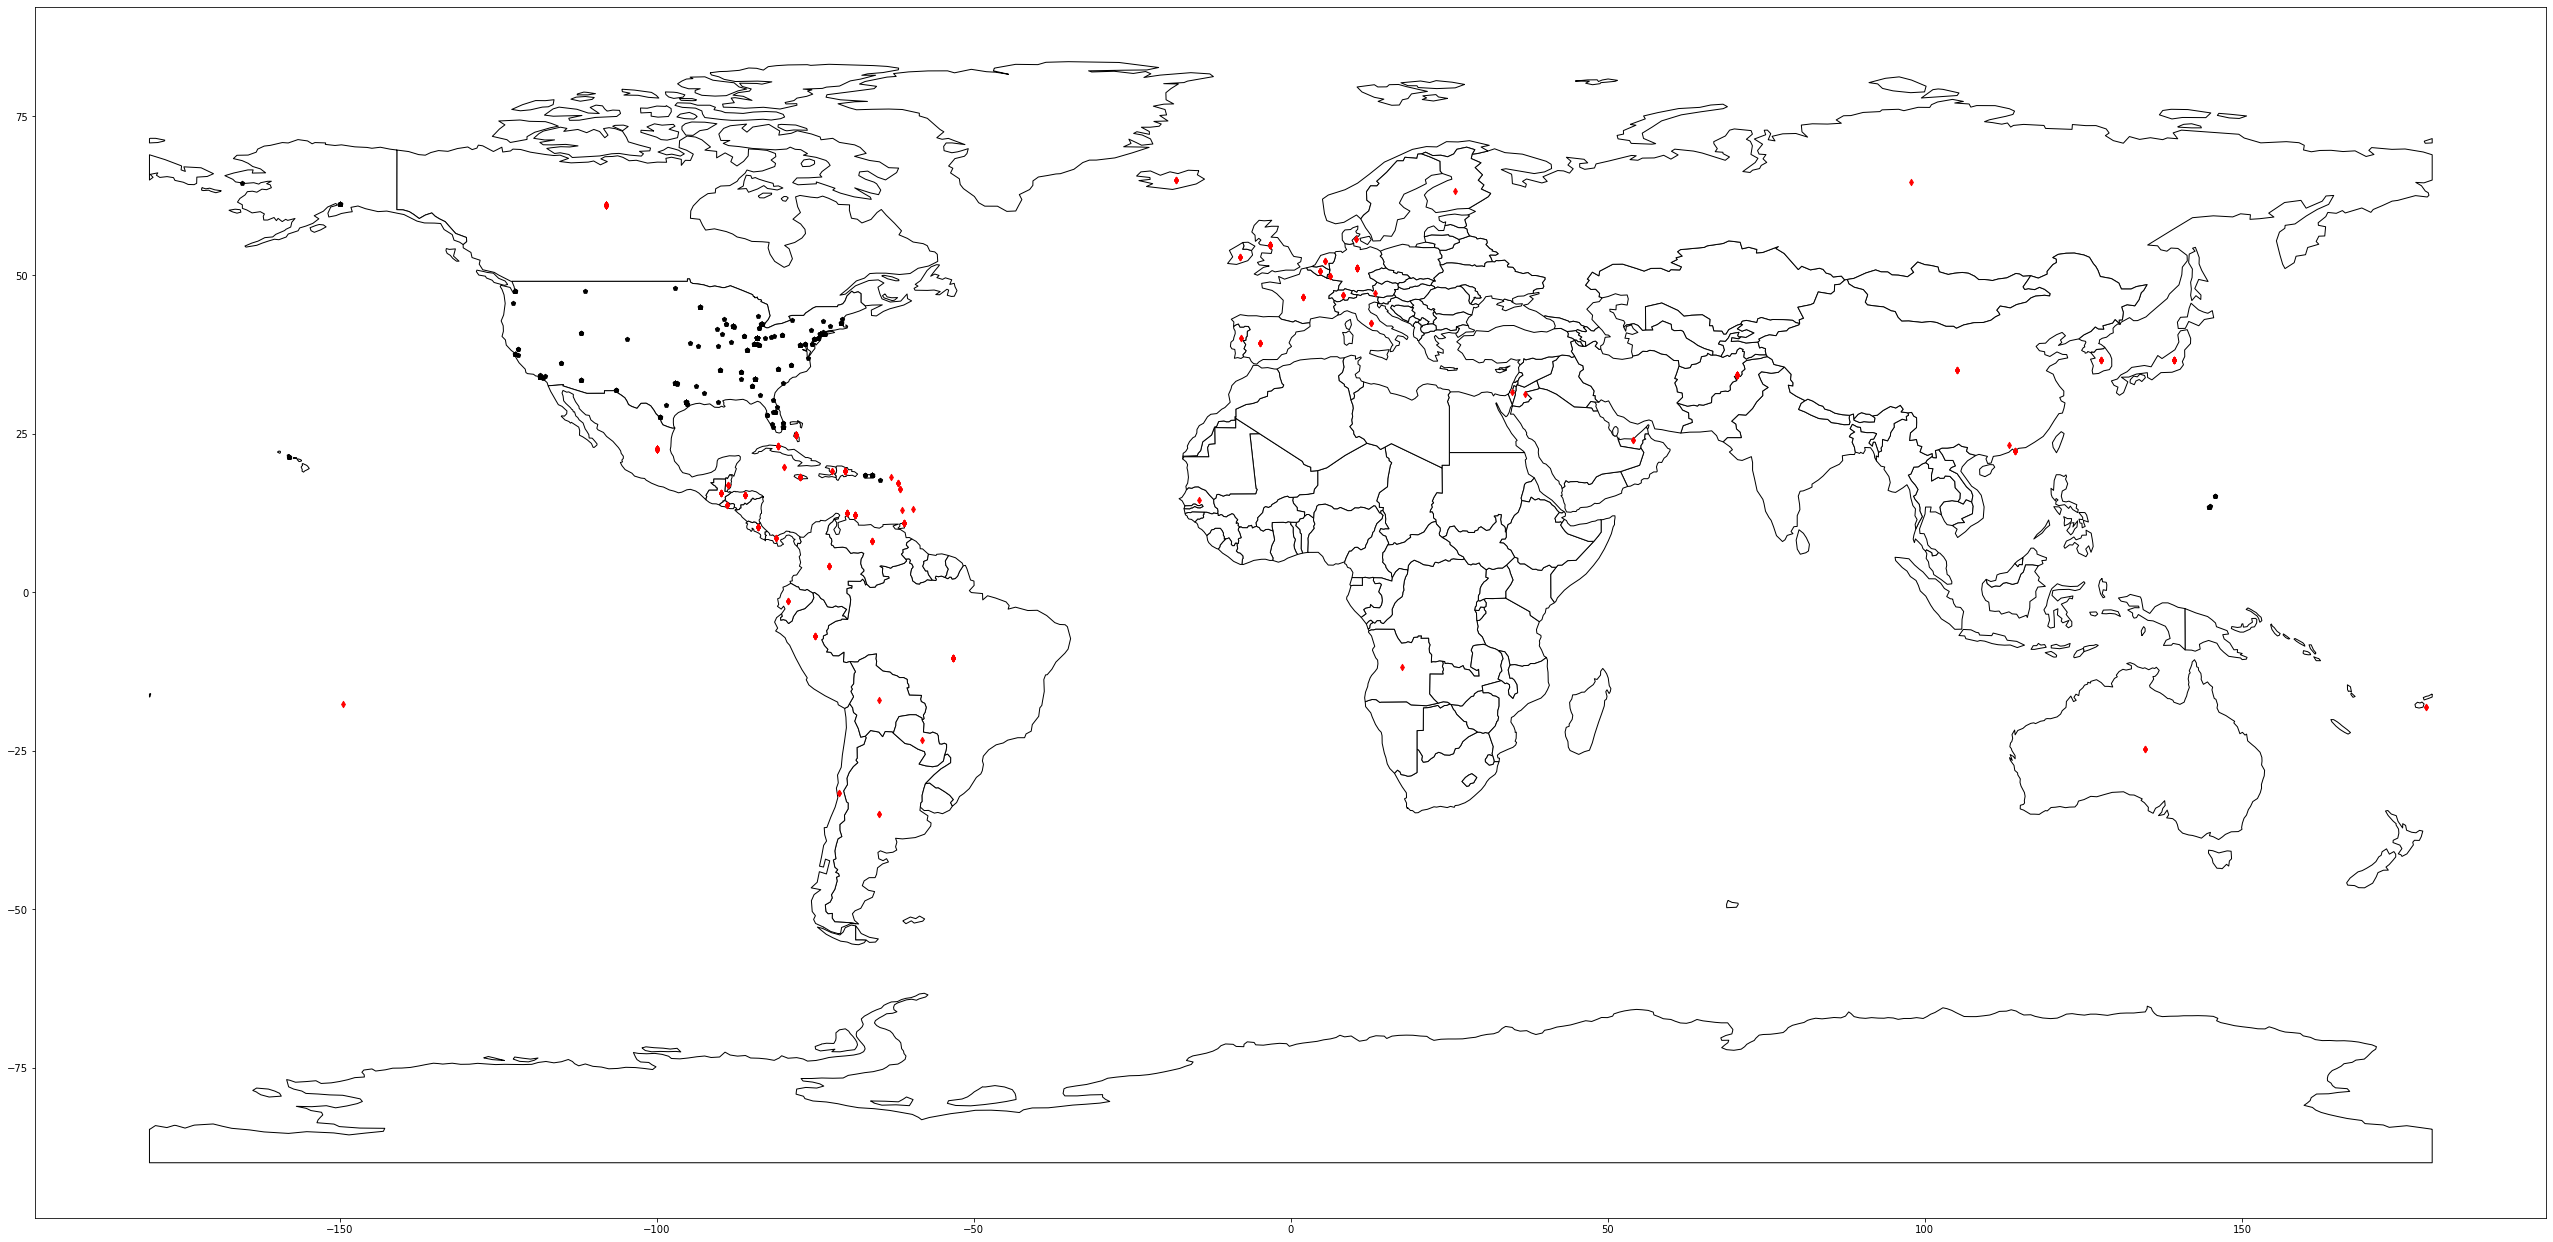

In [214]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
x = gdf_1.plot(ax = ax, marker='p', color='black', markersize=20)
y = gdf_2.plot(ax = ax, marker='d', color='red', markersize=20)
fig = plt.gcf()
fig.set_size_inches(45,30)
plt.show()

In [215]:
# assigning the gdf_2 to a new variable
dis = gdf_2

### 10. Calculating the distance between two locations

__Geopy can calculate geodesic distance. Two distance formulas are included: great-circle distance and Vincenty distance.__

[Info](https://geopy.readthedocs.io/en/release-0.96.3/)

- Great-circle distance (great_circle) uses a spherical model of the earth, using the average great-circle radius of 6372.795 kilometers, resulting in an   error of up to about 0.5%. The radius value is stored in distance.EARTH_RADIUS, so it can be customized (it should always be in kilometers).
- Vincenty distance (vincenty) uses a more accurate ellipsoidal model of the earth. This is the default distance formula, and is thus aliased as distance.distance.

|km |(kilometers)|
|---|------------|
|m |(meters)|
|mi |(miles)|
|ft |(feet)|
|nm, nmi |(nautical miles)

In [216]:
#calculating the distance between two locations using geodesic
from geopy.distance import geodesic
geodesic(dis['Start_Location'][0], dis['End_Location'][0]).kilometers

10078.581821301712

In [217]:
#calculating the distance between two locations using great_circle
from geopy.distance import great_circle
great_circle(dis['Start_Location'][0], dis['End_Location'][0]).kilometers

10055.214499955142

### 10.1 calculating the distance

In [218]:
distance = []
for i in range(len(dis)):
    dis_ = geodesic(dis['Start_Location'][i], dis['End_Location'][i]).kilometers
    distance.append(dis_)

In [219]:
dis.shape

(500, 12)

In [220]:
dis.insert(12,'Total_Distance_kilometers', distance)
dis.head()

,Starting_Airport_code,Start_Location,Ending_Airport_Code,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord,Total_Distance_kilometers
0,ORD,"(41.977984899999996, -87.90917993412859)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",41.977985,-87.909180,36.574844,139.239418,POINT (-87.90918 41.97798),POINT (139.23942 36.57484),10078.581821
1,ANC,"(61.18103525, -149.99789189730433)",CTS,Sapporo - New Chitose Airport,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418,POINT (-149.99789 61.18104),POINT (139.23942 36.57484),5515.053198
2,MIA,"(40.0580258, -84.2236524)",ASU,Asuncion - Asunción International Airport,Paraguay,"(-23.3165935, -58.1693445)",40.058026,-84.223652,-23.316593,-58.169345,POINT (-84.22365 40.05803),POINT (-58.16934 -23.31659),7518.827827
3,ANC,"(61.18103525, -149.99789189730433)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418,POINT (-149.99789 61.18104),POINT (139.23942 36.57484),5515.053198
4,BWI,"(39.1747196, -76.67075505810189)",YYZ,Toronto - Toronto Pearson International Airport,Canada,"(61.0666922, -107.991707)",39.174720,-76.670755,61.066692,-107.991707,POINT (-76.67076 39.17472),POINT (-107.99171 61.06669),3247.706382


In [221]:
usag_data = dis

In [222]:
# creating new columns for longtitudes and latitudes
usag_data['slat_long'] = usag_data[['slong', 'slat']].apply(tuple, axis=1)
usag_data['elat_long'] = usag_data[['elong', 'elat']].apply(tuple, axis=1)

### 11. Interactive visualization using pydeck

In [223]:
import pydeck as pdk

In [352]:
layer = pdk.Layer(
    "GreatCircleLayer",
    usag_data.head(20),
    pickable=True,
    get_stroke_width=12,
    get_source_position="slat_long",
    get_target_position="elat_long",
    get_source_color=[64, 255, 0],
    get_target_color=[0, 128, 200],
    auto_highlight=True,
)

view_state = pdk.ViewState(latitude=50, longitude=-45, zoom=1, bearing=0, pitch=0)
r = pdk.Deck(layers=[layer], initial_view_state=view_state , tooltip={"text": "{Starting_Airport_code} to {Airport_Name} and distance is {Total_Distance_kilometers}"})
r.picking_radius = 10
r.to_html("great_circle_layer.html")

### 12. Calculating Maximum distance from the sample of carrier group 1

In [230]:
usag_data['Year'] = udac_air['Year']

In [302]:
usag_data.head()

,Starting_Airport_code,Start_Location,Ending_Airport_Code,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord,Total_Distance_kilometers,slat_long,elat_long,Year
0,ORD,"(41.977984899999996, -87.90917993412859)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",41.977985,-87.909180,36.574844,139.239418,POINT (-87.90918 41.97798),POINT (139.23942 36.57484),10078.581821,"(-87.90917993412859, 41.977984899999996)","(139.2394179, 36.5748441)",1990
1,ANC,"(61.18103525, -149.99789189730433)",CTS,Sapporo - New Chitose Airport,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418,POINT (-149.99789 61.18104),POINT (139.23942 36.57484),5515.053198,"(-149.99789189730433, 61.18103525)","(139.2394179, 36.5748441)",1990
2,MIA,"(40.0580258, -84.2236524)",ASU,Asuncion - Asunción International Airport,Paraguay,"(-23.3165935, -58.1693445)",40.058026,-84.223652,-23.316593,-58.169345,POINT (-84.22365 40.05803),POINT (-58.16934 -23.31659),7518.827827,"(-84.2236524, 40.0580258)","(-58.1693445, -23.3165935)",1990
3,ANC,"(61.18103525, -149.99789189730433)",NRT,Tokyo - Narita,Japan,"(36.5748441, 139.2394179)",61.181035,-149.997892,36.574844,139.239418,POINT (-149.99789 61.18104),POINT (139.23942 36.57484),5515.053198,"(-149.99789189730433, 61.18103525)","(139.2394179, 36.5748441)",1990
4,BWI,"(39.1747196, -76.67075505810189)",YYZ,Toronto - Toronto Pearson International Airport,Canada,"(61.0666922, -107.991707)",39.174720,-76.670755,61.066692,-107.991707,POINT (-76.67076 39.17472),POINT (-107.99171 61.06669),3247.706382,"(-76.67075505810189, 39.1747196)","(-107.991707, 61.0666922)",1990


In [249]:
!pip install seaborn

In [ ]:
# creating the pivot table
pivot_ = usag_data.pivot_table( values= ['Total_Distance_kilometers'], index = ['Year', 'Starting_Airport_code', 'Ending_Airport_Code'])
pivot_.style.highlight_max( color= 'green', axis = 0)

In [272]:
pivot_.reset_index(inplace= True)

### 13. Interactive visualization with only mean distance

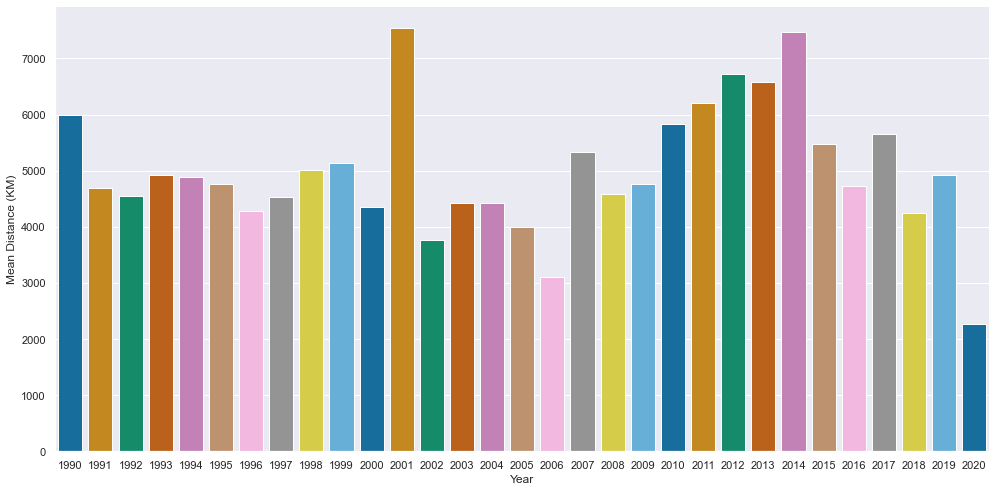

In [274]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_style("darkgrid")
g = sns.catplot(data=pivot_, x = "Year", y="Total_Distance_kilometers", kind = 'bar', height = 7, aspect= 2, ci = None, palette= 'colorblind')
g.set_axis_labels("Year", "Mean Distance (KM)")

In [506]:
layer = pdk.Layer(
    "GreatCircleLayer",
    usag_data[usag_data['Year'] == 2001],
    pickable=True,
    get_stroke_width=12,
    get_source_position="slat_long",
    get_target_position="elat_long",
    get_source_color=[64, 255, 0],
    get_target_color=[0, 128, 200],
    auto_highlight=True,
)

view_state = pdk.ViewState(latitude=50, longitude=-45, zoom=1, bearing=0, pitch=0)
r = pdk.Deck(layers=[layer], initial_view_state=view_state , tooltip={"text": "{Starting_Airport_code} to {Airport_Name} and distance is {Total_Distance_kilometers}"})
r.picking_radius = 10
r.to_html("great_circle_layer.html")

# Repeating all above process for the carrier group 0

In [280]:
# fac = foreign domestic air carriers
fac = data_[data_.loc[:, 'carriergroup'] == 0]
fac.reset_index(drop= True, inplace = True)
print(fac.shape)
fac.head()

(372918, 16)


,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,1990-01-01,1990,1,12889,LAS,85,16173,YQR,921,19523,CP,0,Departures,0,12,12
1,1990-01-01,1990,1,12892,LAX,91,10148,ACA,148,19559,MX,0,Departures,2,0,2
2,1990-01-01,1990,1,12892,LAX,91,12101,HEL,425,19538,AY,0,Departures,16,0,16
3,1990-01-01,1990,1,13244,MEM,54,11032,CUN,148,19892,ACQ,0,Departures,0,19,19
4,1990-01-01,1990,1,14955,SPN,5,13744,NRT,736,19791,NH,0,Departures,28,0,28


In [281]:
fac['usg_apt'].nunique()

704

In [282]:
fac_air = fac.sample(500)
fac_air

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
275303,2014-02-01,2014,2,14747,SEA,93,13744,NRT,736,19791,NH,0,Departures,56,0,56
138066,2002-05-01,2002,5,13303,MIA,33,10717,BON,259,20231,K8,0,Departures,6,0,6
136782,2002-03-01,2002,3,12892,LAX,91,14286,PTY,162,19770,CM,0,Departures,44,0,44
67076,1996-04-01,1996,4,10721,BOS,13,12966,LGW,493,19682,VS,0,Departures,60,0,60
65489,1996-03-01,1996,3,15376,TUS,81,12052,GYM,148,19534,AM,0,Departures,62,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149295,2003-05-01,2003,5,14679,SAN,91,14832,SJD,148,19534,AM,0,Departures,62,0,62
152211,2003-08-01,2003,8,10721,BOS,13,12972,LHR,493,19682,VS,0,Departures,62,0,62
83906,1997-10-01,1997,10,12892,LAX,91,11988,GRU,316,19550,KE,0,Departures,27,0,27
39635,1993-11-01,1993,11,12478,JFK,22,16128,YMX,941,19536,AT,0,Departures,22,0,22


In [284]:
fac_air.reset_index(drop= True, inplace = True)
fac_air.sort_values(by = 'Date', inplace = True)
fac_air

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,1990-03-01,1990,3,14683,SAT,74,13252,MEX,148,19559,MX,0,Departures,62,0,62
1,1990-03-01,1990,3,11618,EWR,21,12066,HAM,429,19554,LH,0,Departures,14,0,14
2,1990-03-01,1990,3,12478,JFK,22,12026,GVA,486,19852,SR,0,Departures,62,0,62
3,1990-03-01,1990,3,11298,DFW,74,11874,GDL,148,19559,MX,0,Departures,36,0,36
4,1990-04-01,1990,4,12478,JFK,22,10287,AMM,639,19568,RJ,0,Departures,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2020-02-01,2020,2,12264,IAD,32,11435,DUB,441,19623,EI,0,Departures,32,0,32
497,2020-03-01,2020,3,11618,EWR,22,14003,PAD,429,21573,1LQ,0,Departures,0,1,1
498,2020-03-01,2020,3,13204,MCO,33,16173,YQR,921,20229,WS,0,Departures,5,0,5
496,2020-03-01,2020,3,14986,SRQ,33,11868,GCM,233,21437,13Q,0,Departures,0,1,1


In [285]:
c0_start = list(fac_air['usg_apt'])

In [ ]:
s0location = [] 
for i in c0_start[0:len(c0_start)]:
    x = addr_long([i])
    s0location.append(x)
s0location

In [289]:
c0 = pd.DataFrame(s0location)
c0.columns = ['Location']
c0['Starting_Airport_code'] = c0_start
c0 = c0.reindex(columns= ["Starting_Airport_code", "Location"])
c0

,Starting_Airport_code,Location
0,SAT,"(29.5334021, -98.46921443046924)"
1,EWR,"(40.68906405, -74.17725485035348)"
2,JFK,"(40.642947899999996, -73.7793733748521)"
3,DFW,"(32.89651945, -97.0465220537124)"
4,JFK,"(40.642947899999996, -73.7793733748521)"
...,...,...
495,IAD,"(38.95226625, -77.45342297783296)"
496,EWR,"(40.68906405, -74.17725485035348)"
497,MCO,"(28.412903550000003, -81.30944309752753)"
498,SRQ,"(27.395988350000003, -82.55407423064528)"


# Using same country_codes data frame as above to extract the country and airport name

In [301]:
country_codes.head()

,Airport,Country,IATA
0,Aarhus,Denmark,AAR
1,Abadan,Iran,ABD
2,Abeche,Chad,AEH
3,Aberdeen,United Kingdom,ABZ
4,Aberdeen (SD),USA,ABR


In [303]:
c0_end = list(fac_air['fg_apt'])

In [304]:
foreign_airport_ = pd.DataFrame(c0_end)
foreign_airport_.columns = ['IATA']
print(foreign_airport_.shape)
foreign_airport_.describe()

(500, 1)


,IATA
count,500
unique,171
top,YYZ
freq,34


In [312]:
foreign_air_ = pd.merge(left = foreign_airport_, right = country_codes, on = ['IATA'], how = 'left')
foreign_air_.columns = ['fg_apt', 'Airport', 'Country']
foreign_air_

,fg_apt,Airport,Country
0,MEX,Mexico City - Mexico City International Airport,Mexico
1,MEX,Mexico City - Juarez International,Mexico
2,HAM,Hamburg - Fuhlsbuettel,Germany
3,GVA,Geneva - Geneva-Cointrin International Airport,Switzerland
4,GDL,Guadalajara,Mexico
...,...,...,...
537,DUB,Dublin - Dublin International Airport,Ireland
538,PAD,Paderborn/Lippstadt,Germany
539,YQR,Regina,Canada
540,GCM,Grand Cayman - Owen Roberts International,Cayman Islands


In [308]:
foreign_airport_.head()

,IATA
0,MEX
1,HAM
2,GVA
3,GDL
4,AMM


### Below loops are used for indetfying which columns to drop

In [ ]:
x = (list(foreign_air_['fg_apt']))
y = (list(foreign_airport_['IATA']))
for i in y:
    print(i)

In [313]:
foreign_air_.drop([1,10,14,34,48,58,66,83,86,112,115,123,126,131,163,170,194,195,208,210,211,
                    226,227,232,275,276,298,302,313,314,317,324,346,349,362, 385, 393, 397,424,431,445,478], inplace= True)

In [315]:
foreign_air_.reset_index(drop= True, inplace= True)
foreign_air_

,fg_apt,Airport,Country
0,MEX,Mexico City - Mexico City International Airport,Mexico
1,HAM,Hamburg - Fuhlsbuettel,Germany
2,GVA,Geneva - Geneva-Cointrin International Airport,Switzerland
3,GDL,Guadalajara,Mexico
4,AMM,Amman - Queen Alia International Airport,Jordan
...,...,...,...
495,DUB,Dublin - Dublin International Airport,Ireland
496,PAD,Paderborn/Lippstadt,Germany
497,YQR,Regina,Canada
498,GCM,Grand Cayman - Owen Roberts International,Cayman Islands


In [316]:
county_ = list(foreign_air_['Country'])
e0location = []
for i in county_[0:len(county_)]:
    x_ = faddr_long([i])
    e0location.append(x_)

In [323]:
f0 = pd.DataFrame(e0location)
f0.columns  = ['elocation']

In [324]:
foreign_air_ = pd.concat([foreign_air_, f0], axis =1)

In [326]:
foreign_air_.head()

,fg_apt,Airport,Country,elocation
0,MEX,Mexico City - Mexico City International Airport,Mexico,"(22.5000485, -100.000037)"
1,HAM,Hamburg - Fuhlsbuettel,Germany,"(51.0834196, 10.4234469)"
2,GVA,Geneva - Geneva-Cointrin International Airport,Switzerland,"(46.7985624, 8.2319736)"
3,GDL,Guadalajara,Mexico,"(22.5000485, -100.000037)"
4,AMM,Amman - Queen Alia International Airport,Jordan,"(31.1667049, 36.941628)"


In [327]:
fac_car = pd.concat([c0, foreign_air_], axis = 1)
fac_car.head(10)

,Starting_Airport_code,Location,fg_apt,Airport,Country,elocation
0,SAT,"(29.5334021, -98.46921443046924)",MEX,Mexico City - Mexico City International Airport,Mexico,"(22.5000485, -100.000037)"
1,EWR,"(40.68906405, -74.17725485035348)",HAM,Hamburg - Fuhlsbuettel,Germany,"(51.0834196, 10.4234469)"
2,JFK,"(40.642947899999996, -73.7793733748521)",GVA,Geneva - Geneva-Cointrin International Airport,Switzerland,"(46.7985624, 8.2319736)"
3,DFW,"(32.89651945, -97.0465220537124)",GDL,Guadalajara,Mexico,"(22.5000485, -100.000037)"
4,JFK,"(40.642947899999996, -73.7793733748521)",AMM,Amman - Queen Alia International Airport,Jordan,"(31.1667049, 36.941628)"
5,PSP,"(33.83033915, -116.50964534531111)",YYC,Calgary - Calgary International Airport,Canada,"(61.0666922, -107.991707)"
6,ORD,"(41.977984899999996, -87.90917993412859)",ACA,Acapulco,Mexico,"(22.5000485, -100.000037)"
7,BOS,"(42.3630236, -71.01340798670637)",YOW,Ottawa - Hull,Canada,"(61.0666922, -107.991707)"
8,MIA,"(40.0580258, -84.2236524)",CCS,Caracas - Simón Bolívar International Airport,Venezuela,"(8.0018709, -66.1109318)"
9,JFK,"(40.642947899999996, -73.7793733748521)",CGN,"Köln, Köln/Bonn",Germany,"(51.0834196, 10.4234469)"


In [328]:
fac_car[['slat', 'slong']] = pd.DataFrame(fac_car['Location'].tolist(), index=fac_car.index)
fac_car[['elat', 'elong']] = pd.DataFrame(fac_car['elocation'].tolist(), index=fac_car.index)
fac_car

,Starting_Airport_code,Location,fg_apt,Airport,Country,elocation,slat,slong,elat,elong
0,SAT,"(29.5334021, -98.46921443046924)",MEX,Mexico City - Mexico City International Airport,Mexico,"(22.5000485, -100.000037)",29.533402,-98.469214,22.500048,-100.000037
1,EWR,"(40.68906405, -74.17725485035348)",HAM,Hamburg - Fuhlsbuettel,Germany,"(51.0834196, 10.4234469)",40.689064,-74.177255,51.083420,10.423447
2,JFK,"(40.642947899999996, -73.7793733748521)",GVA,Geneva - Geneva-Cointrin International Airport,Switzerland,"(46.7985624, 8.2319736)",40.642948,-73.779373,46.798562,8.231974
3,DFW,"(32.89651945, -97.0465220537124)",GDL,Guadalajara,Mexico,"(22.5000485, -100.000037)",32.896519,-97.046522,22.500048,-100.000037
4,JFK,"(40.642947899999996, -73.7793733748521)",AMM,Amman - Queen Alia International Airport,Jordan,"(31.1667049, 36.941628)",40.642948,-73.779373,31.166705,36.941628
...,...,...,...,...,...,...,...,...,...,...
495,IAD,"(38.95226625, -77.45342297783296)",DUB,Dublin - Dublin International Airport,Ireland,"(52.865196, -7.9794599)",38.952266,-77.453423,52.865196,-7.979460
496,EWR,"(40.68906405, -74.17725485035348)",PAD,Paderborn/Lippstadt,Germany,"(51.0834196, 10.4234469)",40.689064,-74.177255,51.083420,10.423447
497,MCO,"(28.412903550000003, -81.30944309752753)",YQR,Regina,Canada,"(61.0666922, -107.991707)",28.412904,-81.309443,61.066692,-107.991707
498,SRQ,"(27.395988350000003, -82.55407423064528)",GCM,Grand Cayman - Owen Roberts International,Cayman Islands,"(19.703182249999998, -79.9174627243246)",27.395988,-82.554074,19.703182,-79.917463


In [329]:
fac_car.columns = ['Starting_Airport_code', 'Start_Location', 'Ending_Airport_Code', 'Airport_Name', 'Country', 'End_Location', 'slat', 'slong', 'elat', 'elong']
fac_car.head(5)

,Starting_Airport_code,Start_Location,Ending_Airport_Code,Airport_Name,Country,End_Location,slat,slong,elat,elong
0,SAT,"(29.5334021, -98.46921443046924)",MEX,Mexico City - Mexico City International Airport,Mexico,"(22.5000485, -100.000037)",29.533402,-98.469214,22.500048,-100.000037
1,EWR,"(40.68906405, -74.17725485035348)",HAM,Hamburg - Fuhlsbuettel,Germany,"(51.0834196, 10.4234469)",40.689064,-74.177255,51.083420,10.423447
2,JFK,"(40.642947899999996, -73.7793733748521)",GVA,Geneva - Geneva-Cointrin International Airport,Switzerland,"(46.7985624, 8.2319736)",40.642948,-73.779373,46.798562,8.231974
3,DFW,"(32.89651945, -97.0465220537124)",GDL,Guadalajara,Mexico,"(22.5000485, -100.000037)",32.896519,-97.046522,22.500048,-100.000037
4,JFK,"(40.642947899999996, -73.7793733748521)",AMM,Amman - Queen Alia International Airport,Jordan,"(31.1667049, 36.941628)",40.642948,-73.779373,31.166705,36.941628


In [330]:
p_3 = gpd.points_from_xy(fac_car.slong, fac_car.slat)
p_4 = gpd.points_from_xy(fac_car.elong, fac_car.elat)

In [331]:
fac_car['start_coord'] = p_3
fac_car['end_coord'] = p_4
fac_car.head()

,Starting_Airport_code,Start_Location,Ending_Airport_Code,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord
0,SAT,"(29.5334021, -98.46921443046924)",MEX,Mexico City - Mexico City International Airport,Mexico,"(22.5000485, -100.000037)",29.533402,-98.469214,22.500048,-100.000037,POINT (-98.46921 29.53340),POINT (-100.00004 22.50005)
1,EWR,"(40.68906405, -74.17725485035348)",HAM,Hamburg - Fuhlsbuettel,Germany,"(51.0834196, 10.4234469)",40.689064,-74.177255,51.083420,10.423447,POINT (-74.17725 40.68906),POINT (10.42345 51.08342)
2,JFK,"(40.642947899999996, -73.7793733748521)",GVA,Geneva - Geneva-Cointrin International Airport,Switzerland,"(46.7985624, 8.2319736)",40.642948,-73.779373,46.798562,8.231974,POINT (-73.77937 40.64295),POINT (8.23197 46.79856)
3,DFW,"(32.89651945, -97.0465220537124)",GDL,Guadalajara,Mexico,"(22.5000485, -100.000037)",32.896519,-97.046522,22.500048,-100.000037,POINT (-97.04652 32.89652),POINT (-100.00004 22.50005)
4,JFK,"(40.642947899999996, -73.7793733748521)",AMM,Amman - Queen Alia International Airport,Jordan,"(31.1667049, 36.941628)",40.642948,-73.779373,31.166705,36.941628,POINT (-73.77937 40.64295),POINT (36.94163 31.16670)


In [332]:
gdf_3 = gpd.GeoDataFrame(fac_car, geometry= 'start_coord')

In [333]:
gdf_4 = gpd.GeoDataFrame(fac_car, geometry= 'end_coord')
gdf_4.head()

,Starting_Airport_code,Start_Location,Ending_Airport_Code,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord
0,SAT,"(29.5334021, -98.46921443046924)",MEX,Mexico City - Mexico City International Airport,Mexico,"(22.5000485, -100.000037)",29.533402,-98.469214,22.500048,-100.000037,POINT (-98.46921 29.53340),POINT (-100.00004 22.50005)
1,EWR,"(40.68906405, -74.17725485035348)",HAM,Hamburg - Fuhlsbuettel,Germany,"(51.0834196, 10.4234469)",40.689064,-74.177255,51.083420,10.423447,POINT (-74.17725 40.68906),POINT (10.42345 51.08342)
2,JFK,"(40.642947899999996, -73.7793733748521)",GVA,Geneva - Geneva-Cointrin International Airport,Switzerland,"(46.7985624, 8.2319736)",40.642948,-73.779373,46.798562,8.231974,POINT (-73.77937 40.64295),POINT (8.23197 46.79856)
3,DFW,"(32.89651945, -97.0465220537124)",GDL,Guadalajara,Mexico,"(22.5000485, -100.000037)",32.896519,-97.046522,22.500048,-100.000037,POINT (-97.04652 32.89652),POINT (-100.00004 22.50005)
4,JFK,"(40.642947899999996, -73.7793733748521)",AMM,Amman - Queen Alia International Airport,Jordan,"(31.1667049, 36.941628)",40.642948,-73.779373,31.166705,36.941628,POINT (-73.77937 40.64295),POINT (36.94163 31.16670)


# Distance Calculations for carrier group 0

In [336]:
dist = gdf_4

In [339]:
distance_ = []
for i in range(len(dist)):
    dist_ = geodesic(dist['Start_Location'][i], dist['End_Location'][i]).kilometers
    distance_.append(dist_)

In [342]:
dist.shape

(500, 12)

In [343]:
dist.insert(12,'Total_Distance_kilometers', distance_)
dist.head()

,Starting_Airport_code,Start_Location,Ending_Airport_Code,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord,Total_Distance_kilometers
0,SAT,"(29.5334021, -98.46921443046924)",MEX,Mexico City - Mexico City International Airport,Mexico,"(22.5000485, -100.000037)",29.533402,-98.469214,22.500048,-100.000037,POINT (-98.46921 29.53340),POINT (-100.00004 22.50005),794.112209
1,EWR,"(40.68906405, -74.17725485035348)",HAM,Hamburg - Fuhlsbuettel,Germany,"(51.0834196, 10.4234469)",40.689064,-74.177255,51.083420,10.423447,POINT (-74.17725 40.68906),POINT (10.42345 51.08342),6298.472592
2,JFK,"(40.642947899999996, -73.7793733748521)",GVA,Geneva - Geneva-Cointrin International Airport,Switzerland,"(46.7985624, 8.2319736)",40.642948,-73.779373,46.798562,8.231974,POINT (-73.77937 40.64295),POINT (8.23197 46.79856),6337.097291
3,DFW,"(32.89651945, -97.0465220537124)",GDL,Guadalajara,Mexico,"(22.5000485, -100.000037)",32.896519,-97.046522,22.500048,-100.000037,POINT (-97.04652 32.89652),POINT (-100.00004 22.50005),1188.178698
4,JFK,"(40.642947899999996, -73.7793733748521)",AMM,Amman - Queen Alia International Airport,Jordan,"(31.1667049, 36.941628)",40.642948,-73.779373,31.166705,36.941628,POINT (-73.77937 40.64295),POINT (36.94163 31.16670),9342.164922


In [348]:
fac_data = dist

In [349]:
fac_data['slat_long'] = fac_data[['slong', 'slat']].apply(tuple, axis=1)
fac_data['elat_long'] = fac_data[['elong', 'elat']].apply(tuple, axis=1)

# Creating Visualization

In [351]:
layer = pdk.Layer(
    "GreatCircleLayer",
    fac_data.head(20),
    pickable=True,
    get_stroke_width=12,
    get_source_position="slat_long",
    get_target_position="elat_long",
    get_source_color=[64, 255, 0],
    get_target_color=[0, 128, 200],
    auto_highlight=True,
)

view_state = pdk.ViewState(latitude=50, longitude=-45, zoom=1, bearing=0, pitch=0)
r = pdk.Deck(layers=[layer], initial_view_state=view_state , tooltip={"text": "{Starting_Airport_code} to {Airport_Name} and distance is {Total_Distance_kilometers}"})
r.picking_radius = 10
r.to_html("great_circle_layer.html")

# Calculating Maximum distance from the sample of carrier group 0

In [354]:
fac_data['Year'] = fac_air['Year']

### Here maximum distance is highlighted

- Maximum distance = 15926.673640 kms (from 'PPG' to 'FRA') 		

In [ ]:
pivot_0 = fac_data.pivot_table( values= ['Total_Distance_kilometers'], index = ['Year', 'Starting_Airport_code', 'Ending_Airport_Code'])
pivot_0.style.highlight_max( color= 'green', axis = 0)

In [361]:
pivot_0.reset_index(inplace= True)

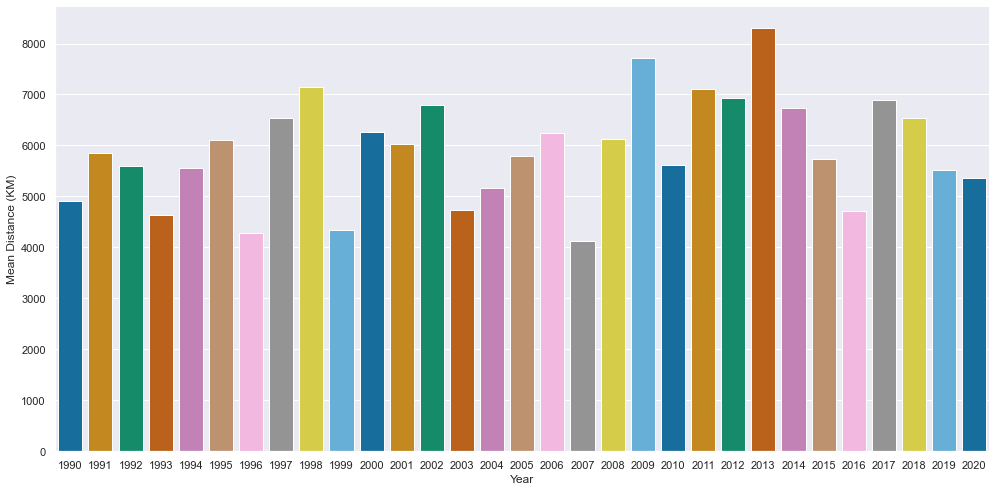

In [362]:
# by default it takes mean distance

import seaborn as sns
sns.set_theme(style="ticks")
sns.set_style("darkgrid")
g = sns.catplot(data=pivot_0, x = "Year", y="Total_Distance_kilometers", kind = 'bar', height = 7, aspect= 2, ci = None, palette= 'colorblind')
g.set_axis_labels("Year", "Mean Distance (KM)")

# Below map is based on the above graph

In [504]:
layer = pdk.Layer(
    "GreatCircleLayer",
    fac_data[fac_data['Year'] == 2013],
    pickable=True,
    get_stroke_width=12,
    get_source_position="slat_long",
    get_target_position="elat_long",
    get_source_color=[64, 255, 0],
    get_target_color=[0, 128, 200],
    auto_highlight=True,
)

view_state = pdk.ViewState(latitude=50, longitude=-45, zoom=1, bearing=0, pitch=0)
r = pdk.Deck(layers=[layer], initial_view_state=view_state , tooltip={"text": "{Starting_Airport_code} to {Airport_Name} and distance is {Total_Distance_kilometers}"})
r.picking_radius = 10
r.to_html("great_circle_layer.html")

# Further calculation based on the top starting and ending airport by using descriptive statistics

In [369]:
data_['usg_apt'].describe()

count     930808
unique      1022
top          MIA
freq      133820
Name: usg_apt, dtype: object

In [370]:
data_['fg_apt'].describe()

count     930808
unique      1669
top          YYZ
freq       50044
Name: fg_apt, dtype: object

In [382]:
Mia_data = data_[data_['usg_apt'] == 'MIA']

In [383]:
Mia_data.reset_index(drop = True, inplace = True)

In [384]:
m_data = Mia_data.sample(500)
m_data.head()

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
13934,1993-06-01,1993,6,13303,MIA,33,14717,SCL,324,19896,UD,0,Departures,54,0,54
71883,2006-04-01,2006,4,13303,MIA,33,14210,POS,280,19805,AA,1,Departures,120,0,120
47349,2000-07-01,2000,7,13303,MIA,33,14838,SJO,110,20308,WE,1,Departures,52,0,52
23854,1995-07-01,1995,7,13303,MIA,33,16128,YMX,941,19558,LY,0,Departures,1,0,1
98446,2012-02-01,2012,2,13303,MIA,33,15567,VCP,316,19917,5X,1,Departures,17,0,17


In [390]:
m_data.sort_values(by = 'Year', inplace= True)
m_data.reset_index(drop= True, inplace = True)
m_data.head()

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,1990-11-01,1990,11,13303,MIA,33,11651,FCO,450,19539,AZ,0,Departures,13,0,13
1,1990-06-01,1990,6,13303,MIA,33,13605,NAS,204,19707,EA,1,Departures,0,1,1
2,1990-07-01,1990,7,13303,MIA,33,12693,KIN,243,19983,KEQ,1,Departures,0,1,1
3,1990-06-01,1990,6,13303,MIA,33,12010,GUA,127,19812,LBQ,1,Departures,0,5,5
4,1990-05-01,1990,5,13303,MIA,33,10711,BOG,327,20440,LC,0,Departures,65,0,65


In [404]:
# this values are taken from running above func - addr_long
a = 25.7949789
b = -80.28672341095405
#start_location = (tuple(a))
start_loc = []
start_loc.append((a,b))

In [405]:
mstart_location = start_loc*500
len(mstart_location)

500

In [407]:
m_data.shape

(500, 16)

In [408]:
m_data.insert(16, 'start_location', mstart_location)

In [409]:
m0_end = list(m_data['fg_apt'])

In [410]:
mforeign_airport_ = pd.DataFrame(m0_end)
mforeign_airport_.columns = ['IATA']
print(mforeign_airport_.shape)
mforeign_airport_.describe()

(500, 1)


,IATA
count,500
unique,116
top,BOG
freq,26


In [411]:
mforeign_air_ = pd.merge(left = mforeign_airport_, right = country_codes, on = ['IATA'], how = 'left')
mforeign_air_.columns = ['fg_apt', 'Airport', 'Country']
mforeign_air_

,fg_apt,Airport,Country
0,FCO,Rome - Fuimicino,Italy
1,NAS,Bahamas - Lynden Pindling International Airport,The Bahamas
2,NAS,Nassau,Bahamas
3,KIN,Kingston - Norman Manley,Jamaica
4,GUA,Guatemala City - La Aurora International Airport,Guatemala
...,...,...,...
537,PLS,NaN,NaN
538,POS,Port of Spain - Piarco International,Trinidad and Tobago
539,SJO,San Jose,Costa Rica
540,MID,Merida,Mexico


In [412]:
mforeign_air_.head()

,fg_apt,Airport,Country
0,FCO,Rome - Fuimicino,Italy
1,NAS,Bahamas - Lynden Pindling International Airport,The Bahamas
2,NAS,Nassau,Bahamas
3,KIN,Kingston - Norman Manley,Jamaica
4,GUA,Guatemala City - La Aurora International Airport,Guatemala


### Here below for loop are used for indentifying to drop excess columns in above dataframe

In [ ]:
x = (list(mforeign_air_['fg_apt']))
y = (list(mforeign_airport_['IATA']))
for i in y:
    print(i)

In [415]:
mforeign_air_.drop([2,15,24,30,71,75,80,103,125,147,148,152,155,160,161,181,209,214,231,240,279,282,297,302,308,310,338,359,369,387,413,
                    417,419,433,435,441,448,455,462,467,479,495], inplace= True)

In [416]:
mforeign_air_.reset_index(drop= True, inplace= True)
mforeign_air_

,fg_apt,Airport,Country
0,FCO,Rome - Fuimicino,Italy
1,NAS,Bahamas - Lynden Pindling International Airport,The Bahamas
2,KIN,Kingston - Norman Manley,Jamaica
3,GUA,Guatemala City - La Aurora International Airport,Guatemala
4,BOG,Bogota - El Nuevo Dorado International Airport,Colombia
...,...,...,...
495,PLS,NaN,NaN
496,POS,Port of Spain - Piarco International,Trinidad and Tobago
497,SJO,San Jose,Costa Rica
498,MID,Merida,Mexico


In [417]:
mcounty_ = list(mforeign_air_['Country'])
m0location = []
for i in mcounty_[0:len(mcounty_)]:
    x_ = faddr_long([i])
    m0location.append(x_)

In [418]:
m0 = pd.DataFrame(m0location)
m0.columns  = ['elocation']

In [419]:
mforeign_air_ = pd.concat([mforeign_air_, m0], axis =1)

In [420]:
mforeign_air_.head()

,fg_apt,Airport,Country,elocation
0,FCO,Rome - Fuimicino,Italy,"(42.504306, 12.572639)"
1,NAS,Bahamas - Lynden Pindling International Airport,The Bahamas,"(24.7736546, -78.0000547)"
2,KIN,Kingston - Norman Manley,Jamaica,"(18.1850507, -77.3947693)"
3,GUA,Guatemala City - La Aurora International Airport,Guatemala,"(15.6356088, -89.8988087)"
4,BOG,Bogota - El Nuevo Dorado International Airport,Colombia,"(4.099917, -72.9088133)"


In [422]:
m_car = pd.concat([m_data, mforeign_air_], axis = 1)
m_car.head(5)

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,carriergroup,type,Scheduled,Charter,Total,start_location,fg_apt,Airport,Country,elocation
0,1990-11-01,1990,11,13303,MIA,33,11651,FCO,450,19539,...,0,Departures,13,0,13,"(25.7949789, -80.28672341095405)",FCO,Rome - Fuimicino,Italy,"(42.504306, 12.572639)"
1,1990-06-01,1990,6,13303,MIA,33,13605,NAS,204,19707,...,1,Departures,0,1,1,"(25.7949789, -80.28672341095405)",NAS,Bahamas - Lynden Pindling International Airport,The Bahamas,"(24.7736546, -78.0000547)"
2,1990-07-01,1990,7,13303,MIA,33,12693,KIN,243,19983,...,1,Departures,0,1,1,"(25.7949789, -80.28672341095405)",KIN,Kingston - Norman Manley,Jamaica,"(18.1850507, -77.3947693)"
3,1990-06-01,1990,6,13303,MIA,33,12010,GUA,127,19812,...,1,Departures,0,5,5,"(25.7949789, -80.28672341095405)",GUA,Guatemala City - La Aurora International Airport,Guatemala,"(15.6356088, -89.8988087)"
4,1990-05-01,1990,5,13303,MIA,33,10711,BOG,327,20440,...,0,Departures,65,0,65,"(25.7949789, -80.28672341095405)",BOG,Bogota - El Nuevo Dorado International Airport,Colombia,"(4.099917, -72.9088133)"


In [423]:
m_car.columns

Index(['Date', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total', 'start_location', 'fg_apt',
       'Airport', 'Country', 'elocation'],
      dtype='object')

In [424]:
m_car.columns = ['Date', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total', 'start_location', 'fg_apt1',
       'Airport', 'Country', 'elocation']

In [425]:
m_car.drop(['fg_apt1'], axis = 1, inplace = True)

In [427]:
m_car.columns = ['Date', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total', 'start_location',
       'Airport', 'Country', 'end_location']
m_car.head()

,Date,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total,start_location,Airport,Country,end_location
0,1990-11-01,1990,11,13303,MIA,33,11651,FCO,450,19539,AZ,0,Departures,13,0,13,"(25.7949789, -80.28672341095405)",Rome - Fuimicino,Italy,"(42.504306, 12.572639)"
1,1990-06-01,1990,6,13303,MIA,33,13605,NAS,204,19707,EA,1,Departures,0,1,1,"(25.7949789, -80.28672341095405)",Bahamas - Lynden Pindling International Airport,The Bahamas,"(24.7736546, -78.0000547)"
2,1990-07-01,1990,7,13303,MIA,33,12693,KIN,243,19983,KEQ,1,Departures,0,1,1,"(25.7949789, -80.28672341095405)",Kingston - Norman Manley,Jamaica,"(18.1850507, -77.3947693)"
3,1990-06-01,1990,6,13303,MIA,33,12010,GUA,127,19812,LBQ,1,Departures,0,5,5,"(25.7949789, -80.28672341095405)",Guatemala City - La Aurora International Airport,Guatemala,"(15.6356088, -89.8988087)"
4,1990-05-01,1990,5,13303,MIA,33,10711,BOG,327,20440,LC,0,Departures,65,0,65,"(25.7949789, -80.28672341095405)",Bogota - El Nuevo Dorado International Airport,Colombia,"(4.099917, -72.9088133)"


In [433]:
m_short = m_car.loc[:,['Year','usg_apt', 'fg_apt', 'start_location', 'Airport', 'Country', 'end_location']]
m_short.head()

,Year,usg_apt,fg_apt,start_location,Airport,Country,end_location
0,1990,MIA,FCO,"(25.7949789, -80.28672341095405)",Rome - Fuimicino,Italy,"(42.504306, 12.572639)"
1,1990,MIA,NAS,"(25.7949789, -80.28672341095405)",Bahamas - Lynden Pindling International Airport,The Bahamas,"(24.7736546, -78.0000547)"
2,1990,MIA,KIN,"(25.7949789, -80.28672341095405)",Kingston - Norman Manley,Jamaica,"(18.1850507, -77.3947693)"
3,1990,MIA,GUA,"(25.7949789, -80.28672341095405)",Guatemala City - La Aurora International Airport,Guatemala,"(15.6356088, -89.8988087)"
4,1990,MIA,BOG,"(25.7949789, -80.28672341095405)",Bogota - El Nuevo Dorado International Airport,Colombia,"(4.099917, -72.9088133)"


In [434]:
m_short[['slat', 'slong']] = pd.DataFrame(m_short['start_location'].tolist(), index=m_short.index)
m_short[['elat', 'elong']] = pd.DataFrame(m_short['end_location'].tolist(), index=m_short.index)
m_short

,Year,usg_apt,fg_apt,start_location,Airport,Country,end_location,slat,slong,elat,elong
0,1990,MIA,FCO,"(25.7949789, -80.28672341095405)",Rome - Fuimicino,Italy,"(42.504306, 12.572639)",25.794979,-80.286723,42.504306,12.572639
1,1990,MIA,NAS,"(25.7949789, -80.28672341095405)",Bahamas - Lynden Pindling International Airport,The Bahamas,"(24.7736546, -78.0000547)",25.794979,-80.286723,24.773655,-78.000055
2,1990,MIA,KIN,"(25.7949789, -80.28672341095405)",Kingston - Norman Manley,Jamaica,"(18.1850507, -77.3947693)",25.794979,-80.286723,18.185051,-77.394769
3,1990,MIA,GUA,"(25.7949789, -80.28672341095405)",Guatemala City - La Aurora International Airport,Guatemala,"(15.6356088, -89.8988087)",25.794979,-80.286723,15.635609,-89.898809
4,1990,MIA,BOG,"(25.7949789, -80.28672341095405)",Bogota - El Nuevo Dorado International Airport,Colombia,"(4.099917, -72.9088133)",25.794979,-80.286723,4.099917,-72.908813
...,...,...,...,...,...,...,...,...,...,...,...
495,2020,MIA,PLS,"(25.7949789, -80.28672341095405)",NaN,NaN,"(34.220389, 70.3800314)",25.794979,-80.286723,34.220389,70.380031
496,2020,MIA,POS,"(25.7949789, -80.28672341095405)",Port of Spain - Piarco International,Trinidad and Tobago,"(10.8677845, -60.9821067)",25.794979,-80.286723,10.867785,-60.982107
497,2020,MIA,SJO,"(25.7949789, -80.28672341095405)",San Jose,Costa Rica,"(10.2735633, -84.0739102)",25.794979,-80.286723,10.273563,-84.073910
498,2020,MIA,MID,"(25.7949789, -80.28672341095405)",Merida,Mexico,"(22.5000485, -100.000037)",25.794979,-80.286723,22.500048,-100.000037


In [435]:
m_short.columns = ['Year', 'Starting_Airport_code', 'Ending_Airport_Code','Start_Location', 'Airport_Name', 'Country', 'End_Location', 'slat', 'slong', 'elat', 'elong']
m_short.head(5)

,Year,Starting_Airport_code,Ending_Airport_Code,Start_Location,Airport_Name,Country,End_Location,slat,slong,elat,elong
0,1990,MIA,FCO,"(25.7949789, -80.28672341095405)",Rome - Fuimicino,Italy,"(42.504306, 12.572639)",25.794979,-80.286723,42.504306,12.572639
1,1990,MIA,NAS,"(25.7949789, -80.28672341095405)",Bahamas - Lynden Pindling International Airport,The Bahamas,"(24.7736546, -78.0000547)",25.794979,-80.286723,24.773655,-78.000055
2,1990,MIA,KIN,"(25.7949789, -80.28672341095405)",Kingston - Norman Manley,Jamaica,"(18.1850507, -77.3947693)",25.794979,-80.286723,18.185051,-77.394769
3,1990,MIA,GUA,"(25.7949789, -80.28672341095405)",Guatemala City - La Aurora International Airport,Guatemala,"(15.6356088, -89.8988087)",25.794979,-80.286723,15.635609,-89.898809
4,1990,MIA,BOG,"(25.7949789, -80.28672341095405)",Bogota - El Nuevo Dorado International Airport,Colombia,"(4.099917, -72.9088133)",25.794979,-80.286723,4.099917,-72.908813


In [436]:
p_5 = gpd.points_from_xy(m_short.slong, m_short.slat)
p_6 = gpd.points_from_xy(m_short.elong, m_short.elat)

In [437]:
m_short['start_coord'] = p_5
m_short['end_coord'] = p_6
m_short.head()

,Year,Starting_Airport_code,Ending_Airport_Code,Start_Location,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord
0,1990,MIA,FCO,"(25.7949789, -80.28672341095405)",Rome - Fuimicino,Italy,"(42.504306, 12.572639)",25.794979,-80.286723,42.504306,12.572639,POINT (-80.28672 25.79498),POINT (12.57264 42.50431)
1,1990,MIA,NAS,"(25.7949789, -80.28672341095405)",Bahamas - Lynden Pindling International Airport,The Bahamas,"(24.7736546, -78.0000547)",25.794979,-80.286723,24.773655,-78.000055,POINT (-80.28672 25.79498),POINT (-78.00005 24.77365)
2,1990,MIA,KIN,"(25.7949789, -80.28672341095405)",Kingston - Norman Manley,Jamaica,"(18.1850507, -77.3947693)",25.794979,-80.286723,18.185051,-77.394769,POINT (-80.28672 25.79498),POINT (-77.39477 18.18505)
3,1990,MIA,GUA,"(25.7949789, -80.28672341095405)",Guatemala City - La Aurora International Airport,Guatemala,"(15.6356088, -89.8988087)",25.794979,-80.286723,15.635609,-89.898809,POINT (-80.28672 25.79498),POINT (-89.89881 15.63561)
4,1990,MIA,BOG,"(25.7949789, -80.28672341095405)",Bogota - El Nuevo Dorado International Airport,Colombia,"(4.099917, -72.9088133)",25.794979,-80.286723,4.099917,-72.908813,POINT (-80.28672 25.79498),POINT (-72.90881 4.09992)


In [438]:
gdf_5 = gpd.GeoDataFrame(m_short, geometry= 'start_coord')

In [439]:
gdf_6 = gpd.GeoDataFrame(m_short, geometry= 'end_coord')
gdf_6.head()

,Year,Starting_Airport_code,Ending_Airport_Code,Start_Location,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord
0,1990,MIA,FCO,"(25.7949789, -80.28672341095405)",Rome - Fuimicino,Italy,"(42.504306, 12.572639)",25.794979,-80.286723,42.504306,12.572639,POINT (-80.28672 25.79498),POINT (12.57264 42.50431)
1,1990,MIA,NAS,"(25.7949789, -80.28672341095405)",Bahamas - Lynden Pindling International Airport,The Bahamas,"(24.7736546, -78.0000547)",25.794979,-80.286723,24.773655,-78.000055,POINT (-80.28672 25.79498),POINT (-78.00005 24.77365)
2,1990,MIA,KIN,"(25.7949789, -80.28672341095405)",Kingston - Norman Manley,Jamaica,"(18.1850507, -77.3947693)",25.794979,-80.286723,18.185051,-77.394769,POINT (-80.28672 25.79498),POINT (-77.39477 18.18505)
3,1990,MIA,GUA,"(25.7949789, -80.28672341095405)",Guatemala City - La Aurora International Airport,Guatemala,"(15.6356088, -89.8988087)",25.794979,-80.286723,15.635609,-89.898809,POINT (-80.28672 25.79498),POINT (-89.89881 15.63561)
4,1990,MIA,BOG,"(25.7949789, -80.28672341095405)",Bogota - El Nuevo Dorado International Airport,Colombia,"(4.099917, -72.9088133)",25.794979,-80.286723,4.099917,-72.908813,POINT (-80.28672 25.79498),POINT (-72.90881 4.09992)


# Distance Calculations 

In [454]:
mdist = gdf_6

In [455]:
mdistance_ = []
for i in range(len(mdist)):
    mdist_ = geodesic(mdist['Start_Location'][i], mdist['End_Location'][i]).kilometers
    mdistance_.append(mdist_)

In [461]:
mdist.shape

(500, 13)

In [460]:
mdist.drop(['Total_Distance_kilometers','slat_long','elat_long'], axis = 1, inplace = True)

In [462]:
mdist.insert(13,'Total_Distance_kilometers', mdistance_)
mdist.head()

,Year,Starting_Airport_code,Ending_Airport_Code,Start_Location,Airport_Name,Country,End_Location,slat,slong,elat,elong,start_coord,end_coord,Total_Distance_kilometers
0,1990,MIA,FCO,"(25.7949789, -80.28672341095405)",Rome - Fuimicino,Italy,"(42.504306, 12.572639)",25.794979,-80.286723,42.504306,12.572639,POINT (-80.28672 25.79498),POINT (12.57264 42.50431),8341.793634
1,1990,MIA,NAS,"(25.7949789, -80.28672341095405)",Bahamas - Lynden Pindling International Airport,The Bahamas,"(24.7736546, -78.0000547)",25.794979,-80.286723,24.773655,-78.000055,POINT (-80.28672 25.79498),POINT (-78.00005 24.77365),256.588116
2,1990,MIA,KIN,"(25.7949789, -80.28672341095405)",Kingston - Norman Manley,Jamaica,"(18.1850507, -77.3947693)",25.794979,-80.286723,18.185051,-77.394769,POINT (-80.28672 25.79498),POINT (-77.39477 18.18505),893.904820
3,1990,MIA,GUA,"(25.7949789, -80.28672341095405)",Guatemala City - La Aurora International Airport,Guatemala,"(15.6356088, -89.8988087)",25.794979,-80.286723,15.635609,-89.898809,POINT (-80.28672 25.79498),POINT (-89.89881 15.63561),1504.540137
4,1990,MIA,BOG,"(25.7949789, -80.28672341095405)",Bogota - El Nuevo Dorado International Airport,Colombia,"(4.099917, -72.9088133)",25.794979,-80.286723,4.099917,-72.908813,POINT (-80.28672 25.79498),POINT (-72.90881 4.09992),2526.743711


In [463]:
mi_data = mdist

In [464]:
mi_data['slat_long'] = mi_data[['slong', 'slat']].apply(tuple, axis=1)
mi_data['elat_long'] = mi_data[['elong', 'elat']].apply(tuple, axis=1)

# Visualization

In [505]:
layer = pdk.Layer(
    "GreatCircleLayer",
    mi_data.head(20),
    pickable=True,
    get_stroke_width=12,
    get_source_position="slat_long",
    get_target_position="elat_long",
    get_source_color=[64, 255, 0],
    get_target_color=[0, 128, 200],
    auto_highlight=True,
)

view_state = pdk.ViewState(latitude=50, longitude=-45, zoom=1, bearing=0, pitch=0)
r = pdk.Deck(layers=[layer], initial_view_state=view_state , tooltip={"text": "Miami International Airport to {Airport_Name} and distance is {Total_Distance_kilometers}"})
r.picking_radius = 10
r.to_html("great_circle_layer.html")

# Calculating Maximum distance from the flight travelled from Miami International Airport

In [ ]:
mpivot_ = mi_data.pivot_table( values= ['Total_Distance_kilometers'], index = ['Year', 'Starting_Airport_code', 'Ending_Airport_Code'])
mpivot_.style.highlight_max( color= 'green', axis = 0)

In [477]:
mi_data.groupby(['Year','Starting_Airport_code','Ending_Airport_Code'])['Total_Distance_kilometers'].max()

Year  Starting_Airport_code  Ending_Airport_Code
1990  MIA                    BOG                     2526.743711
                             EZE                     6919.456439
                             FCO                     8341.793634
                             GCM                      675.676986
                             GUA                     1504.540137
                                                        ...     
2020  MIA                    HAV                      313.067560
                             MID                     2034.458584
                             PLS                    12679.961829
                             POS                     2618.928619
                             SJO                     1763.818024
Name: Total_Distance_kilometers, Length: 437, dtype: float64

In [478]:
mpivot_.reset_index(inplace= True)

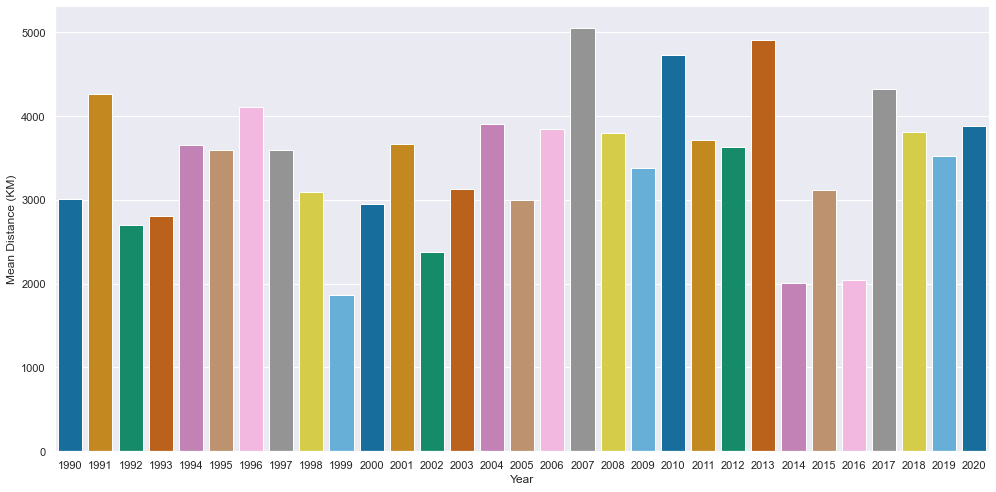

In [479]:
# by default it takes mean distance

import seaborn as sns
sns.set_theme(style="ticks")
sns.set_style("darkgrid")
g = sns.catplot(data=mpivot_, x = "Year", y="Total_Distance_kilometers", kind = 'bar', height = 7, aspect= 2, ci = None, palette= 'colorblind')
g.set_axis_labels("Year", "Mean Distance (KM)")

## Below map is based on the above graph

In [482]:
layer = pdk.Layer(
    "GreatCircleLayer",
    mi_data[mi_data['Year'] == 2007],
    pickable=True,
    get_stroke_width=12,
    get_source_position="slat_long",
    get_target_position="elat_long",
    get_source_color=[64, 255, 0],
    get_target_color=[0, 128, 200],
    auto_highlight=True,
)

view_state = pdk.ViewState(latitude=50, longitude=-45, zoom=1, bearing=0, pitch=0)
r = pdk.Deck(layers=[layer], initial_view_state=view_state , tooltip={"text": "Miami International Airport to {Airport_Name} and distance is {Total_Distance_kilometers}"})
r.picking_radius = 10
r.to_html("great_circle_layer.html")

# __Conculsion__

### Based on the descriptive analysis on the original dataset. It found that MIA - Miami International Airport is mostly used US Airport

    - Intitally in this analysis. Carrier group 1 were analyzed first which are "US" domestic air carriers
    - Next Carrier group 0 were analyzed first which are "foreign" domestic air carriers

### Random sample is taken from this dataset for carrier group "1" and "0" with size of 500 and size is considered based on the confidence interval, confidence level

### In this analysis distance between two locations is calcaulated by using geopy library

### Intitally visulaization is done by using the "geopandas" but in order to make attractive visualiaztion "pydeck" library utilized.

### __Final__

    - For carrier group '1'. In year 2001 peak year
    - For carrier group '0'. In year 2013 is peak year
    - In year 2007 is airlines from MIA (MIA - Miami International Airport) travelled longer distances (based on the mean)